In [13]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets
from torchvision.transforms import v2

plt.style.use("ggplot")

In [9]:
# Step 1: Define the transform to convert the image to a float tensor
transform = v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])

# Step 2: Load the MNIST dataset
train_dataset = datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
test_dataset = datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)

# Step 3: Combine training and testing datasets
full_dataset = torch.utils.data.ConcatDataset([train_dataset, test_dataset])

# Step 4: Create a DataLoader to batch the data for efficient processing
data_loader = torch.utils.data.DataLoader(full_dataset, batch_size=1000, shuffle=False)

# Step 5: Collect all pixel values
pixel_values = []

for batch_idx, (data, target) in enumerate(data_loader):
    # data shape is [batch_size, 1, 28, 28]
    # Flatten the data to [batch_size, 784]
    data = data.view(data.size(0), -1)
    # Convert to NumPy and extend the pixel_values list
    pixel_values.extend(data.numpy().flatten())

# Convert the list to a numpy array
pixel_values = np.array(pixel_values)

# Step 6: Define bins from 0 to 1 with bin size 0.05
bins = np.arange(0, 1.05, 0.05)  # Includes the endpoint 1.0


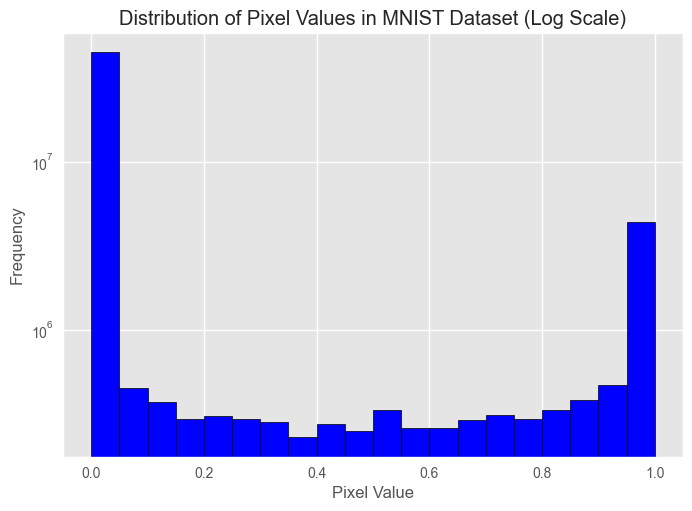

In [14]:
# Step 7: Create the histogram
plt.hist(pixel_values, bins=bins, edgecolor="black", log=True, color="blue")

# Step 8: Add title and labels to the plot
plt.title("Distribution of Pixel Values in MNIST Dataset (Log Scale)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

# Step 9: Display the plot
plt.show()